# Exploratory Analysis

We load and consolidate the features we have identified. The consolidated features dataframe is saved in a separate CSV file.

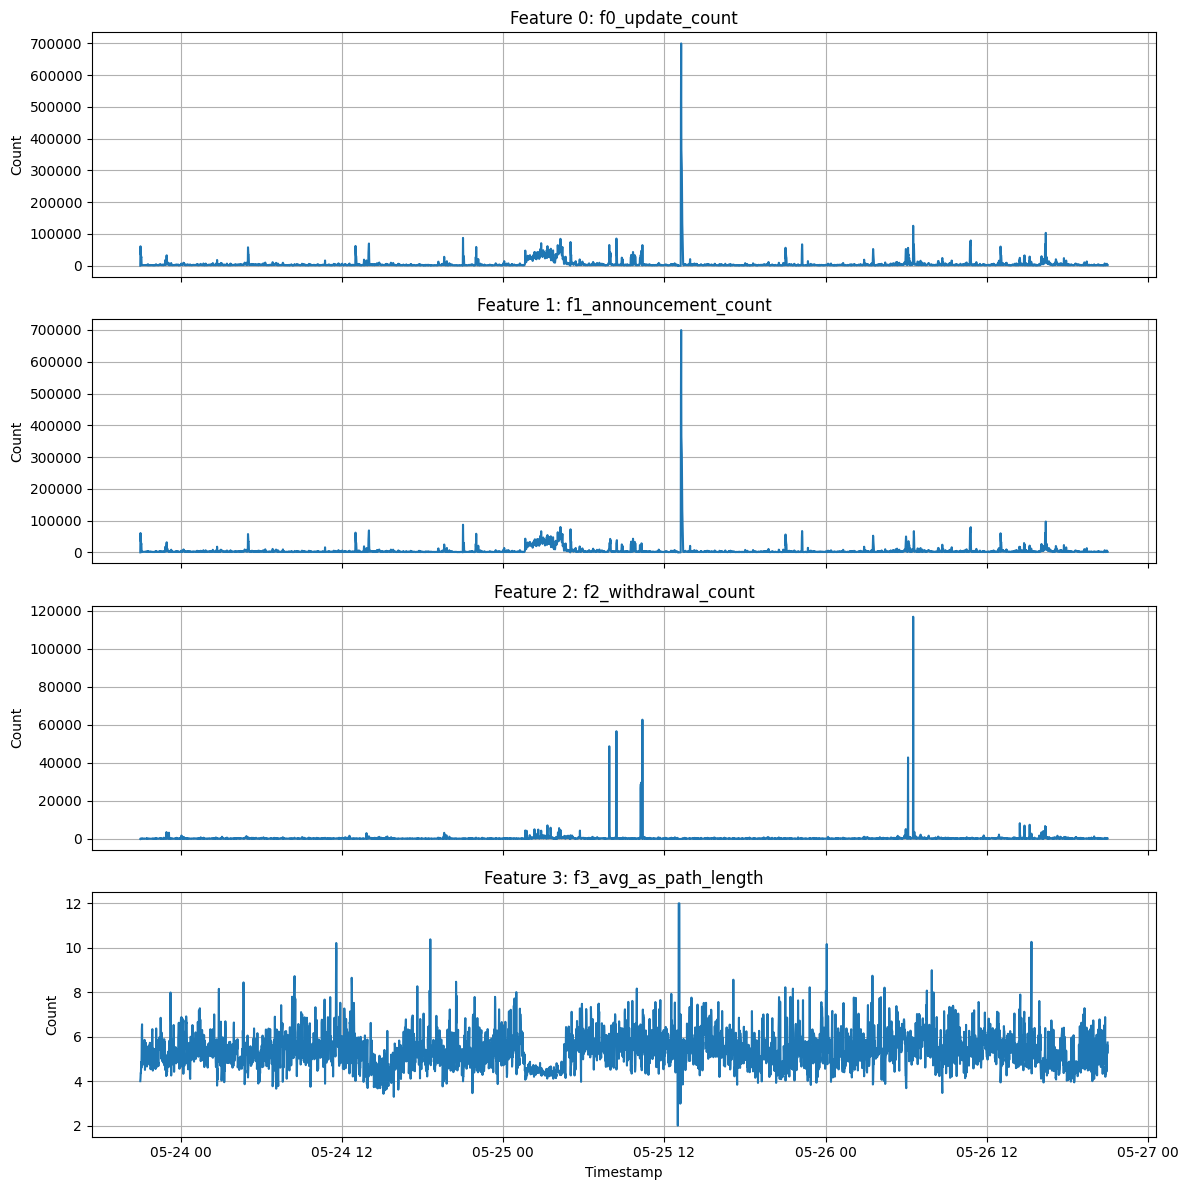

In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

INCIDENT="2005-moscow-blackout"
COLLECTOR="rrc03"
# File paths for the feature files
feature_0_file = f"../features/{INCIDENT}/feature_0_{COLLECTOR}.csv"
feature_1_file = f"../features/{INCIDENT}/feature_1_{COLLECTOR}.csv"
feature_2_file = f"../features/{INCIDENT}/feature_2_{COLLECTOR}.csv"
feature_3_file = f"../features/{INCIDENT}/feature_3_{COLLECTOR}.csv"

# Function to dynamically rename columns based on the feature name in the file
def load_and_rename(file_path, prefix):
    # Load the file
    df = pd.read_csv(file_path)
    # Extract the feature name (assuming it's consistent in the "feature_name" column)
    feature_name = df['feature_name'].iloc[0]
    # Rename the value column to include the prefix and feature name
    df = df.rename(columns={"timestamp": "timestamp", "value": f"{prefix}_{feature_name}"})
    # Drop the 'feature_name' column as it's no longer needed
    df = df.drop(columns=["feature_name"])
    return df

# Load and rename feature data
df_f0 = load_and_rename(feature_0_file, "f0")
df_f1 = load_and_rename(feature_1_file, "f1")
df_f2 = load_and_rename(feature_2_file, "f2")
df_f3 = load_and_rename(feature_3_file, "f3")

# Merge dataframes on 'timestamp'
merged_df = pd.merge(df_f0, df_f1, on="timestamp", how="outer")
merged_df = pd.merge(merged_df, df_f2, on="timestamp", how="outer")
merged_df = pd.merge(merged_df, df_f3, on="timestamp", how="outer")

# Fill missing values with 0
merged_df.fillna(0, inplace=True)

# Convert timestamp to datetime for better plotting
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

# Preview the merged dataframe
merged_df.head()

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot each feature dynamically
for i, (col, ax) in enumerate(zip(merged_df.columns[1:], axs)):  # Skip 'timestamp'
    ax.plot(merged_df['timestamp'], merged_df[col])
    ax.set_title(f"Feature {i}: {col}")
    ax.set_ylabel("Count")
    ax.grid(True)

# Add xlabel to the last subplot
axs[-1].set_xlabel("Timestamp")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [39]:
df_f3.head()

,timestamp,f3_avg_as_path_length
0,2005-05-23 21:00:00,4.910638
1,2005-05-23 21:01:00,5.378928
2,2005-05-23 21:02:00,5.136706
3,2005-05-23 21:03:00,4.982206
4,2005-05-23 21:04:00,5.276423


In [34]:
merged_df.head()

,timestamp,f0_update_count,f1_announcement_count,f2_withdrawal_count
0,2005-05-23 21:00:00,14,10,0
1,2005-05-23 21:01:00,60995,60714,217
2,2005-05-23 21:02:00,34886,34700,175
3,2005-05-23 21:03:00,35069,34873,150
4,2005-05-23 21:04:00,25854,25731,112
